### A Binary Convolution class in PyTorch, where weights are binary, and incorporating a forward method within the class.

Epoch [1/10] - Loss: 4.7639, Accuracy: 0.2500
Epoch [2/10] - Loss: 0.0000, Accuracy: 1.0000
Epoch [3/10] - Loss: 0.0000, Accuracy: 1.0000
Epoch [4/10] - Loss: 0.0000, Accuracy: 1.0000
Epoch [5/10] - Loss: 0.0000, Accuracy: 1.0000
Epoch [6/10] - Loss: 0.0000, Accuracy: 1.0000
Epoch [7/10] - Loss: 0.0000, Accuracy: 1.0000
Epoch [8/10] - Loss: 0.0000, Accuracy: 1.0000
Epoch [9/10] - Loss: 0.0000, Accuracy: 1.0000
Epoch [10/10] - Loss: 0.0000, Accuracy: 1.0000


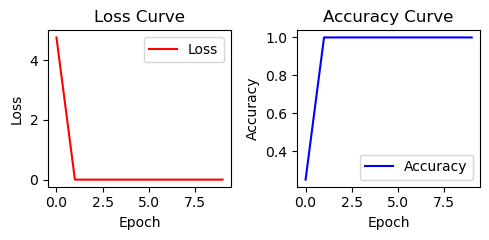

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define BinaryConv2d
class BinaryConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, bias=False):
        super(BinaryConv2d, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding

        # Initialize weights randomly and then binarize
        self.weights = nn.Parameter(torch.rand(out_channels, in_channels, kernel_size, kernel_size))
        self.binarize_weights()

        if bias:
            self.bias = nn.Parameter(torch.zeros(out_channels))
        else:
            self.bias = None

    def binarize_weights(self):
        # Binarize weights using the sign function
        self.weights.data = torch.sign(self.weights.data)

    def forward(self, x):
        # Perform binary convolution using the binarized weights
        self.binarize_weights()  # Re-binarize during forward pass
        out = nn.functional.conv2d(x, self.weights, bias=self.bias, stride=self.stride, padding=self.padding)
        return out


# Define the simple network
class SimpleBinaryConvNet(nn.Module):
    def __init__(self):
        super(SimpleBinaryConvNet, self).__init__()
        self.binary_conv = BinaryConv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(16 * 32 * 32, 10)  # Fully connected layer for classification

    def forward(self, x):
        x = self.binary_conv(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x


# Initialize model, loss, and optimizer
torch.manual_seed(42)
model = SimpleBinaryConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Dummy dataset (random input and labels)
input_tensor = torch.randn(16, 3, 32, 32)  # Batch size of 16, 3 channels, 32x32 resolution
labels = torch.randint(0, 10, (16,))  # Random labels for 10 classes

# Track metrics
loss_values = []
accuracy_values = []

# Training loop
epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()  # Zero gradients
    outputs = model(input_tensor)  # Forward pass
    loss = criterion(outputs, labels)  # Compute loss
    loss_values.append(loss.item())  # Store loss

    # Compute accuracy
    _, predictions = torch.max(outputs, 1)
    accuracy = (predictions == labels).sum().item() / labels.size(0)
    accuracy_values.append(accuracy)

    loss.backward()  # Backward pass
    optimizer.step()  # Update weights

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

# Plot loss vs. accuracy
plt.figure(figsize=(5, 2.5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(loss_values, label="Loss", color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy_values, label="Accuracy", color='blue')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.tight_layout()
plt.show()
